# Analysing FiveThirtyEight's 2014 Star Wars Survey

In this project we'll be exploring, cleaning and analysing a data set abou Star Wars from the [FiveThirtyEight website](https://fivethirtyeight.com/).

While waiting for Star Wars: The Force Awakens to come out, the team at FiveThirtyEight surveyed Star Wars fans using the online tool SurveyMonkey. They received 835 total responses, which you download from their [GitHub repository](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey).The data has several columns, including:

* RespondentID - An anonymized ID for the respondent (person taking the survey)
* Gender - The respondent's gender
* Age - The respondent's age
* Household Income - The respondent's income
* Education - The respondent's education level
* Location (Census Region) - The respondent's location
* Have you seen any of the 6 films in the Star Wars franchise? - Has a Yes or No response
* Do you consider yourself to be a fan of the Star Wars film franchise? - Has a Yes or No response
* Which character shot first?
* Are you familiar with the Expanded Universe?

The main goal of this project to answer some questions about the popularity of each Star Wars episode.

**Disclaimer: This is guided project from the DataQuest's "Data Cleaning Project Walkthrough" course developed by learning purposes. Although it may look like other projects made for the same reason, this project has some features of its own that were implemented by me. Every line of code in this project was though of and typed by me.**

## Exploring the Data

Let's begin by importing the libraries we'll use and reading the `.csv` file into a DataFrame.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

Let's take a look at the first five rows of the `star_wars` DataFrame and then we'll print the name of all its columns.

In [2]:
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [3]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

We can notice three main points here:

* The `RespondentID` column is supposed to be a unique iD for each respondent, but as we can see it contains some null values, which does not make much sense. We'll fix this by removing these those rows.

* Some columns, such as the second and third ones, only contain values fo 'Yes' and 'No'. We can transform these values into booleans so it's easier to work with.

* For some questions, the respondent had to check one or more boxes and this type of data is difficult to represent in columnar format. For instance, the respondent checked off a series of boxes in response to the question, `Which of the following Star Wars films have you seen? Please select all that apply.` The columns for this question are:

    * Which of the following Star Wars films have you seen? Please select all that apply. - Whether or not the respondent saw Star Wars: Episode I The Phantom Menace.
    * Unnamed: 4 - Whether or not the respondent saw Star Wars: Episode II Attack of the Clones.
    * Unnamed: 5 - Whether or not the respondent saw Star Wars: Episode III Revenge of the Sith.
    * Unnamed: 6 - Whether or not the respondent saw Star Wars: Episode IV A New Hope.
    * Unnamed: 7 - Whether or not the respondent saw Star Wars: Episode V The Empire Strikes Back.
    * Unnamed: 8 - Whether or not the respondent saw Star Wars: Episode VI Return of the Jedi.
    
For columns like these, we'll also tranform the data into boolean values. We'll rename the columns so their name becomes more intuitive too.

## Cleaning the Data

First, let's exclude the rows where the `RespondentID` column is null.

In [4]:
star_wars = star_wars[star_wars['RespondentID'].notnull()]
star_wars['RespondentID'].isnull().sum()

0

Now, we'll use the `Series.map()` method to solve the second point mentioned above, transforming the values in the second and third columns to boolean values.

In [5]:
yes_no = {'Yes' : True, 'No' : False}

star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no)
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no)


Let's check the result.

In [6]:
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


We'll also use the `Series.map()` method to deal with the third point we listed, transforming the values in the next six columns to booleans.

In [7]:
films_seen = {
    'Star Wars: Episode I  The Phantom Menace': True, np.nan: False,
    'Star Wars: Episode II  Attack of the Clones' : True, 
    'Star Wars: Episode III  Revenge of the Sith' : True, 
    'Star Wars: Episode IV  A New Hope' : True, 
    'Star Wars: Episode V The Empire Strikes Back' : True,
    'Star Wars: Episode VI Return of the Jedi' : True
    }
   

for col in star_wars.columns[3:9]:
    star_wars[col] = star_wars[col].map(films_seen)

star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


As these columns represent if each respondent saw each movie, we'll rename them so they become more intuitive.

In [8]:
star_wars = star_wars.rename(columns = {
    'Which of the following Star Wars films have you seen? Please select all that apply.' : 'seen_1',
    'Unnamed: 4' : 'seen_2',
    'Unnamed: 5' : 'seen_3',
    'Unnamed: 6' : 'seen_4',
    'Unnamed: 7' : 'seen_5',
    'Unnamed: 8' : 'seen_6'
})
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expanded Universe?',
       'Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦',
       'Do 

As we move on to next columns, we can see that they show the same pattern. The difference is that these columns contain values from 1 to 6 that represent the ranking of preffered films for each respondent.

* Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film. - The respondent' ranking for Star Wars: Episode I The Phantom Menace
* Unnamed: 10 - The respondent' ranking for Star Wars: Episode II Attack of the Clones
* Unnamed: 11 - The respondent' ranking for Star Wars: Episode III Revenge of the Sith
* Unnamed: 12 - The respondent' ranking for Star Wars: Episode IV A New Hope
* Unnamed: 13 - The respondent' ranking for Star Wars: Episode V The Empire Strikes Back
* Unnamed: 14 - The respondent' ranking for Star Wars: Episode VI Return of the Jedi

We'll convert these values to a numeric type and then rename the columns, just like we did for the past six columns.

In [9]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [10]:
star_wars = star_wars.rename(columns = {
    'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.' : 'ranking_1',
    'Unnamed: 10' : 'ranking_2',
    'Unnamed: 11' : 'ranking_3',
    'Unnamed: 12' : 'ranking_4',
    'Unnamed: 13' : 'ranking_5',
    'Unnamed: 14' : 'ranking_6'
})
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6', 'ranking_1',
       'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5', 'ranking_6',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expanded Universe?',
       'Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦',
       'Do you consider yourself to be a fan of the Star Trek franchise?',
       'Gender', 'Age', 'Household Income', 'Education',
       'Location (Census Region)'],

## Analysis

As these columns now contain numeric values, we can calculate the average ranking for each movie.

In [11]:
ranking = star_wars[star_wars.columns[9:15]].mean()
ranking.sort_values(ascending=False)

ranking_3    4.341317
ranking_2    4.087321
ranking_1    3.732934
ranking_4    3.272727
ranking_6    3.047847
ranking_5    2.513158
dtype: float64

We can also plot this in a bar chart. Note that we first created two lists that are used to set the labels and colors in the charts.

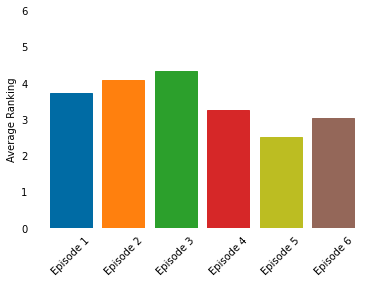

In [12]:
films = ['Episode 1', 'Episode 2', 'Episode 3', 'Episode 4', 'Episode 5', 'Episode 6']
colors = [(0/255,107/255,164/255), (255/255, 128/255, 14/255), (44/255, 160/255, 44/255), (214/255, 39/255, 40/255), (188/255, 189/255, 34/255), (148/255, 103/255, 89/255)  ] 

fig, ax = plt.subplots()
ax.bar(range(6), ranking, align='center', color=colors, edgecolor=colors)
ax.tick_params(bottom=False, top=False, left=False, right=False)
plt.xticks(np.arange(6), films, rotation=45)
ax.set_ylim(0,6)
ax.set_ylabel('Average Ranking')

for kew, spine in ax.spines.items():
    spine.set_visible(False)
    
plt.show()

Episode 3 has the highest average ranking and episode 5 has the lowest one.

We'll repeat the process to find out the most seen movie. But now we'll transform the values to percentages.

In [13]:
most_seen = star_wars[star_wars.columns[3:9]].sum() / star_wars.shape[0]  * 100
most_seen.sort_values(ascending=False)

seen_5    63.912310
seen_6    62.225970
seen_1    56.745363
seen_4    51.180438
seen_2    48.145025
seen_3    46.374368
dtype: float64

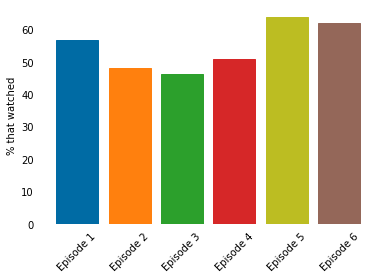

In [14]:
fig, ax = plt.subplots()
ax.bar(range(6), most_seen, align='center', color=colors, edgecolor=colors)
ax.tick_params(bottom=False, top=False, left=False, right=False)
plt.xticks(np.arange(6), films, rotation=45)
ax.set_ylabel('% that watched')
for kew, spine in ax.spines.items():
    spine.set_visible(False)
    
plt.show()

Episodes 5 and 6 are the most seen while Episode 3 is the less seen. It's interesting to note that the most seen episode has the lowest ranking while the less seen episode has the highest ranking.

### Gender

We'll now split the DataFrame by genders and then we'll see the ranking and the most watched episodes by each gender.

In [15]:
males = star_wars[star_wars['Gender'] == 'Male']
females = star_wars[star_wars['Gender'] == 'Female']

ranking_m = males[males.columns[9:15]].mean()
ranking_f = females[females.columns[9:15]].mean()

print('Male ranking')
print(ranking_m.sort_values(ascending=False))
print('\n')
print('Female ranking')
print(ranking_f.sort_values(ascending=False))

Male ranking
ranking_3    4.274882
ranking_2    4.224586
ranking_1    4.037825
ranking_6    3.002364
ranking_4    2.997636
ranking_5    2.458629
dtype: float64


Female ranking
ranking_3    4.418136
ranking_2    3.954660
ranking_4    3.544081
ranking_1    3.429293
ranking_6    3.078086
ranking_5    2.569270
dtype: float64


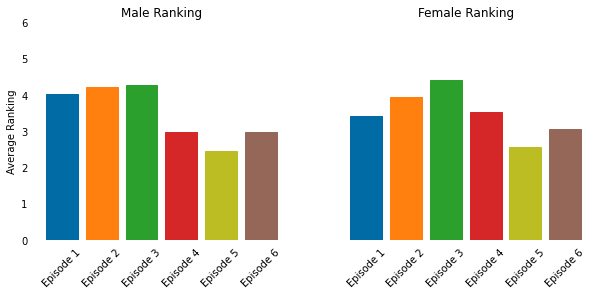

In [28]:
fig = plt.figure(figsize=(10, 4))

for i in range(0,2):
    ax = fig.add_subplot(1, 2, i+1)
    
    chart = ranking_f
    title = 'Female Ranking'
    ax.tick_params(labelleft=False)
    
    if i == 0:
        chart = ranking_m
        title = 'Male Ranking'
        ax.set_ylabel('Average Ranking')
        ax.tick_params(labelleft=True)
        
    ax.bar(range(6), chart, align='center', color=colors, edgecolor=colors)
    ax.tick_params(bottom=False, top=False, left=False, right=False)
    plt.xticks(np.arange(6), films, rotation=45)
    ax.set_title(title)
    ax.set_ylim(0,6)

    for kew, spine in ax.spines.items():
        spine.set_visible(False)
    
plt.show()

The charts are pretty much the same.

Now let's see the most seen movies for each gender.

In [17]:
seen_m = males[males.columns[3:9]].sum()/ males.shape[0]  * 100
seen_f = females[females.columns[3:9]].sum()/ females.shape[0]  * 100

print('Male ranking')
print(seen_m.sort_values(ascending=False))
print('\n')
print('Female ranking')
print(seen_f.sort_values(ascending=False))

Male ranking
seen_5    78.873239
seen_6    77.867203
seen_1    72.635815
seen_4    68.812877
seen_2    64.989940
seen_3    63.782696
dtype: float64


Female ranking
seen_5    64.298725
seen_6    61.566485
seen_1    54.280510
seen_4    46.448087
seen_2    43.169399
seen_3    40.437158
dtype: float64


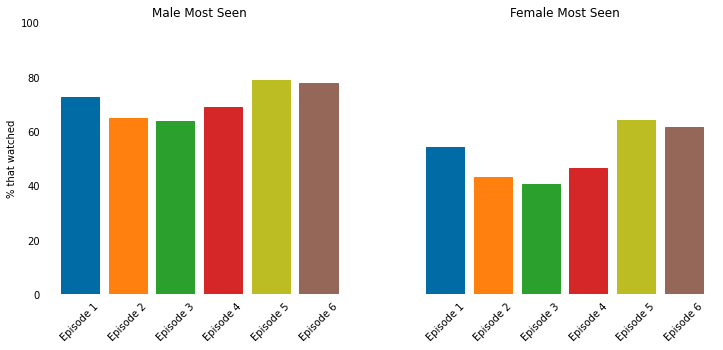

In [18]:
fig = plt.figure(figsize=(12, 5))

for i in range(0,2):
    ax = fig.add_subplot(1, 2, i+1)
    
    chart = seen_f
    title = 'Female Most Seen'
    ax.tick_params(labelleft=False)
    
    if i == 0:
        chart = seen_m
        title = 'Male Most Seen'
        ax.set_ylabel('% that watched')
        ax.tick_params(labelleft=True)
        
    ax.bar(range(6), chart, align='center', color=colors, edgecolor=colors)
    ax.tick_params(bottom=False, top=False, left=False, right=False)
    plt.xticks(np.arange(6), films, rotation=45)
    ax.set_title(title)
    ax.set_ylim(0,100)

    for kew, spine in ax.spines.items():
        spine.set_visible(False)
    
plt.show()

The order of the most watched episodes is the same. Less women watched the movies, though.

### Education
We'll now explore the `Education` column as we create a ranking for each distinct level of edcuation in the survey.

In [19]:
unique_edu = star_wars['Education'].dropna().unique()

rankings_edu = []

for c in unique_edu:
    df = star_wars[star_wars['Education'] == c]
    ranking_c = df[df.columns[9:15]].mean()
    rankings_edu.append(ranking_c)
    
    print(c)
    print(ranking_c.sort_values(ascending=False))
    print('\n')

High school degree
ranking_3    4.126761
ranking_1    3.802817
ranking_2    3.746479
ranking_6    3.239437
ranking_4    3.211268
ranking_5    2.873239
dtype: float64


Bachelor degree
ranking_3    4.521073
ranking_2    4.290076
ranking_1    3.828244
ranking_4    3.114504
ranking_6    2.931298
ranking_5    2.309160
dtype: float64


Some college or Associate degree
ranking_3    4.102362
ranking_2    3.885827
ranking_1    3.551181
ranking_4    3.503937
ranking_6    3.173228
ranking_5    2.783465
dtype: float64


Graduate degree
ranking_3    4.500000
ranking_2    4.225664
ranking_1    3.822222
ranking_4    3.199115
ranking_6    2.920354
ranking_5    2.323009
dtype: float64


Less than high school degree
ranking_2    5.333333
ranking_1    5.000000
ranking_3    3.666667
ranking_6    3.333333
ranking_4    2.666667
ranking_5    1.000000
dtype: float64




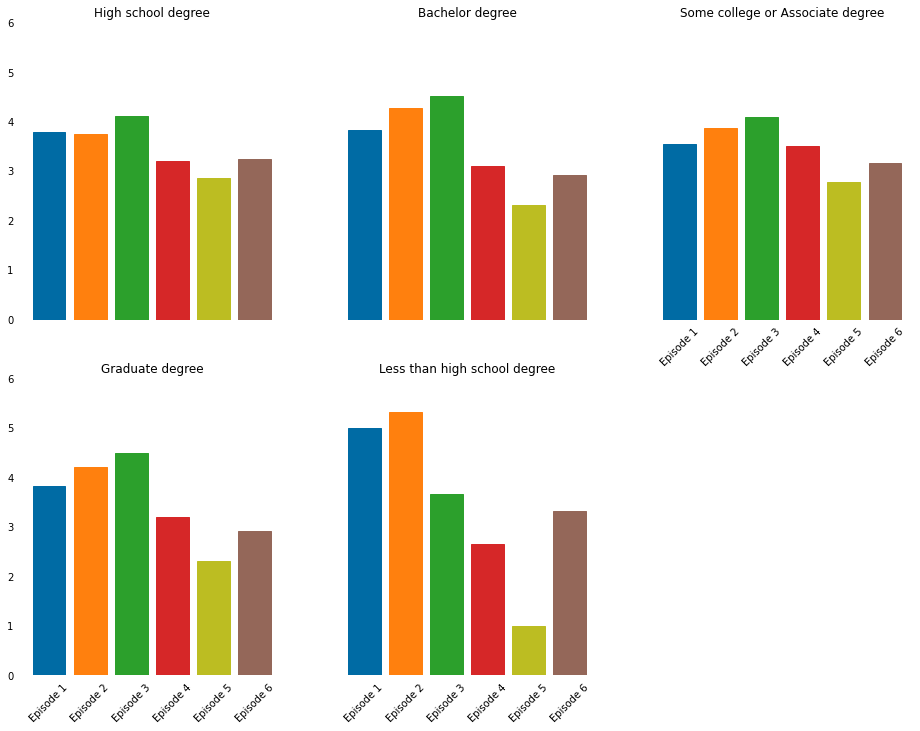

In [20]:
fig = plt.figure(figsize=(16,12))

for i in range (0,5):
    ax = fig.add_subplot(2, 3, i+1)
    ax.bar(range(6), rankings_edu[i], align='center', color=colors, edgecolor=colors)
    ax.set_title(unique_edu[i])
    ax.tick_params(bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
    ax.set_ylim(0,6)
    plt.xticks(np.arange(6), films, rotation=45)
    
    if i >= 2:
        ax.tick_params(labelbottom=True)
        
    if i ==0 or i == 3:
        ax.tick_params(labelleft=True)
    
    for kew, spine in ax.spines.items():
        spine.set_visible(False)
    
plt.show()

Episode 5 has the lowest ranking in every level of education, while Episode 3 has the highest ranking in all levels of education but 'Less than high school degree'. The ranking for peolple with less than high school degree also is the most volatile one, the reason for this might be that it is the category with the smallest sample, as we can see below. 

In [21]:
star_wars['Education'].value_counts()
    

Some college or Associate degree    328
Bachelor degree                     321
Graduate degree                     275
High school degree                  105
Less than high school degree          7
Name: Education, dtype: int64

### Who Shot First?

As we approch the end of this projecct, we'll investigate the relation between the answer in the 'Do you consider yourself to be a fan of the Star Wars film franchise?' column and the answer in the 'Which character shot first?' column. That is a [controversial  topic](https://en.wikipedia.org/wiki/Han_shot_first) for Star Wars fans and we expect to find that the answer for this question differs if the respondent considers himself a Star Wars fan or not.

In [22]:
fan = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].dropna().unique()

fan_shot = []
for i in fan:
    df = star_wars[star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] == i]
    shot = pd.Series(df.iloc[:,29].value_counts().sort_index())
    fan_shot.append(shot)
    print('Fan: {}'.format(i))
    print(shot.sort_values(ascending=False))
    print('\n)')

Fan: True
Han                                 268
Greedo                              151
I don't understand this question    126
Name: Which character shot first?, dtype: int64

)
Fan: False
I don't understand this question    180
Han                                  57
Greedo                               46
Name: Which character shot first?, dtype: int64

)


Now let's plot the charts.

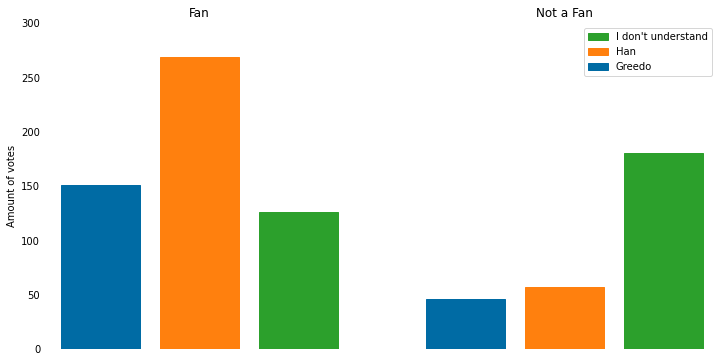

In [23]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1, 2, 1)
ax.bar(range(3), fan_shot[0], align='center', color=colors, edgecolor=colors)
ax.set_title('Fan')
ax.tick_params(bottom=False, top=False, left=False, right=False, labelbottom=False)
ax.set_ylim(0,300)
ax.set_ylabel('Amount of votes')
for kew, spine in ax.spines.items():
    spine.set_visible(False)   

    
ax = fig.add_subplot(1, 2, 2)
ax.bar(range(2,3), fan_shot[1][2], align='center', color=(44/255, 160/255, 44/255), edgecolor=(44/255, 160/255, 44/255), label="I don't understand")
ax.bar(range(1,2), fan_shot[1][1], align='center', color=(255/255, 128/255, 14/255), edgecolor=(255/255, 128/255, 14/255), label='Han')
ax.bar(range(1), fan_shot[1][0], align='center', color=(0/255,107/255,164/255), edgecolor=(0/255,107/255,164/255), label='Greedo')

ax.set_title('Not a Fan')
ax.tick_params(bottom=False, top=False, left=False, right=False, labelleft=False, labelbottom=False)
ax.set_ylim(0,300)
ax.legend()
for kew, spine in ax.spines.items():
    spine.set_visible(False)
    
plt.show()

As expected, the answers were very different. Most of the fans think Han Solo shot firts and the others are pretty divided between Greedo shot first and those that did not understand the question. For the no fans, however, the absolutely marjority did not understand the question. It is also import no note that the number of fans the reponded the survey is greater than the number of not fans.